# example CMIP EC Calc

In [1]:
import sys
sys.path.append(sys.path[0]+'/../../')

#import my functions
import helpers.fileHandler as fh
import utils._modelDefinitions as _model
import utils.ecIndex as ec

# handy python functions
import xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


# turn off warnings:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#pick a model
iModel=_model.scenarioMip[7]

In [3]:
# For all the models, calculate the alphas and e/c Index

print(iModel[1])

climatXr=fh.loadModelData(iModel[1], 'tos_Omon', 'piControl', iModel[2]).tos

CIESM
v20200220


In [16]:
tsXr = xarray.concat([
    fh.loadModelData(iModel[1], 'tos_Omon', 'historical', iModel[3]).tos, 
    fh.loadModelData(iModel[1], 'tos_Omon', 'ssp585', iModel[3]).tos
], dim='time')

v20200220
v20200220


In [17]:
sstAnomXr=ec.sstAnoms(tsXr, climatXr)

In [18]:
sstAnomXr.values

array([[[-8.52469578e-01,             nan,             nan, ...,
         -1.04214802e-01, -2.06523075e-01, -2.77960911e-01],
        [-8.65916386e-01,             nan,             nan, ...,
         -9.03235817e-02, -1.99854984e-01, -2.53213062e-01],
        [-8.64785328e-01,             nan,             nan, ...,
         -7.66345406e-02, -1.86713352e-01, -2.24696293e-01],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,  3.49300957e-02, -3.84799385e-02],
        [            nan,             nan,             nan, ...,
          2.30057583e-01,  3.40450859e-02, -3.39251900e-02],
        [            nan,             nan,             nan, ...,
          2.32004986e-01,  3.57731438e-02, -2.71407509e-02]],

       [[-5.36369874e-01,             nan,             nan, ...,
         -4.76923539e-01, -5.55504395e-01, -5.01272751e-01],
        [-5.41243149e-01,             nan,             nan, ...,
         -4.53953339e-01, -5.11385514e

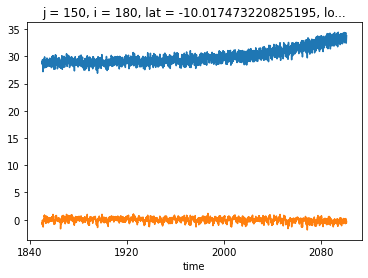

In [19]:
tsXr.sel(j=150,i=180).plot()
sstAnomXr.sel(j=150,i=180).plot()

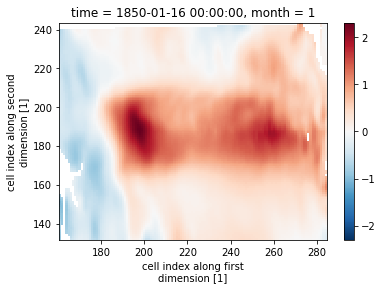

In [20]:
sstAnomXr.isel(time=0).plot()

In [22]:
indeces, pFit, eofsXr = ec.ecIndex(sstAnomXr)



In [23]:
indeces

<xarray.Dataset>
Dimensions:   (time: 3012)
Coordinates:
  * time      (time) object 1850-01-16 00:00:00 ... 2100-12-16 00:00:00
    month     (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    pc1       (time) float64 -1.287 -1.394 -1.414 ... -0.1004 0.1438 0.3147
    pc2       (time) float64 -0.05554 0.5844 0.8772 ... -2.951 -3.199 -3.154
    alpha     float64 -0.07391
    alphaDjf  float64 0.5308

In [ ]:
indeces.pc1.plot()
indeces.pc2.plot()

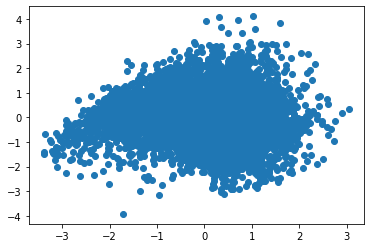

In [21]:
plt.scatter(indeces.pc1.values, indeces.pc2.values)

In [14]:
eofsXr

<xarray.DataArray 'eofs' (mode: 2, j: 112, i: 124)>
array([[[ 1.60836797e-03,             nan,             nan, ...,
          7.83881212e-04,  7.73075434e-04,  4.89083250e-04],
        [ 1.73656876e-03,             nan,             nan, ...,
          7.06344523e-04,  6.21805085e-04,  2.05382512e-04],
        [ 1.88285627e-03,             nan,             nan, ...,
          6.26866703e-04,  4.72893410e-04, -5.91022185e-05],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,  2.04832728e-03,  2.11442293e-03],
        [            nan,             nan,             nan, ...,
          1.93676518e-03,  2.07242553e-03,  2.13296966e-03],
        [            nan,             nan,             nan, ...,
          1.96806493e-03,  2.09859540e-03,  2.15251812e-03]],

       [[ 2.23151211e-04,             nan,             nan, ...,
         -1.56913147e-03, -1.98466449e-03, -2.60097152e-03],
        [ 1.29884838e-04,             nan,             nan, ...,
         -1.79156111e-03, -2.28594371e-03, -3.01579458e-03],
        [ 2.82464082e-05,             nan,             nan, ...,
         -2.03952951e-03, -2.60141197e-03, -3.42018060e-03],
        ...,
        [            nan,             nan,             nan, ...,
                     nan, -4.51529764e-03, -4.85801326e-03],
        [            nan,             nan,             nan, ...,
         -3.75757622e-03, -4.42323020e-03, -4.78160570e-03],
        [            nan,             nan,             nan, ...,
         -3.68966274e-03, -4.32385570e-03, -4.70123983e-03]]])
Coordinates:
  * mode     (mode) int64 0 1
  * j        (j) int32 132 133 134 135 136 137 138 ... 238 239 240 241 242 243
  * i        (i) int32 161 162 163 164 165 166 167 ... 279 280 281 282 283 284
    lat      (j, i) float64 -14.87 -14.87 -14.87 -14.87 ... 14.92 14.91 14.91
    lon      (j, i) float64 140.6 141.7 142.8 143.9 ... 275.6 276.7 277.8 279.0
Attributes:
    long_name:  empirical_orthogonal_functions

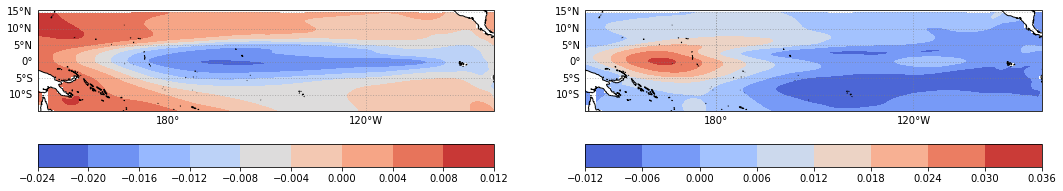

In [15]:
fig=plt.figure(figsize=(18,12))
for mode in [0,1]:
    ax=fig.add_subplot(1,2,mode+1,projection=ccrs.Miller(central_longitude=210))
    ec.ensoPlotter(eofsXr.sel(mode=mode),ax)